# COGS 118A - Final Project

# Names


- Jacob Au
- Evan Liu
- Lauren Lui
- Rina Kaura

# Abstract 

The focus of our project is centered around predicting an individual’s quality of sleep based on an individual’s exercise habits and thus hopefully improving the quality of sleep. The goal of our project is to implement a model which accurately predicts and improves the quality of sleep. We will examine data collected from Lifesnaps Fitbit data which obtained various information on the exercise such as activity type, sleep duration, the amount of minutes to fall asleep, sleep efficiency, number of activity minutes, and BPM. With the collected data, we will utilize a linear regression model to make predictions and identify relationships between an individual’s quality of sleep and the exercise features as listed above. The performance of our linear regression model will be assessed using the mean absolute error (MAE), mean squared error (MSE), and the R-squared metric. 


# Background

There is a lot of prior research investigating the correlation between exercise and sleep quality. The general consensus tends to be that exercise can improve sleep quality and duration for all age groups[1]. However, some studies show that exercise has a greater positive effect on people over 40 years of age than under[2], especially when these older individuals live a rather sedentary life[4]. Exercise has also been shown to be an effective substitute for pharmacological interventions to improve sleep quality in insomniacs[3]. The participants in our dataset come from a wide range of age groups and fall everywhere on the scale of sedentary to active lifestyle. Luckily, whether their exercise consisted of walking, cycling, aerobics, or sports shouldn’t affect the effectiveness of our model since prior research shows increases in exercise intensity and duration doesn’t appear to have significant effects on sleep quality[5]. With the existing body of knowledge, we know that there is indeed a correlation between exercise and sleep that we hope to predict with our model. 
One unanswered question from the literature is how strong the correlation between exercise and sleep quality is. The studies investigating the correlation were mostly just trying to find its existence and not its strength. The studies testing the strength of the correlation had biases and limitations that call their findings into question. Many of them had a majority, if not solely, male subject group for their study which is not a representative sample. Hence, with a representative database, our group is aiming to test the correlation between exercise and sleep quality by seeing if we can successfully train a model to predict sleep quality based on type, duration, and intensity of exercise. There is a risk of there not being a strong correlation between the two variables, but that is also something our group is willing to investigate and debunk or prove.

# Problem Statement

The problem our project aims to address is improving the quality of an individual’s sleep based on one’s exercise habits, which is quantifiable, measurable, and replicable. We predict that exercise and quality of sleep must be correlated. This begs the question of how. What kind of exercise? How much exercise? When do you exercise? How do these factors affect your quality of sleep? Thanks to recent advances in personal technology, in particular the Fitbit, we are able to easily gain lots of quantitative data on people’s sleeping (rem/sleep ratio, duration, etc) and exercise habits (kind of exercise, heart rate, calories burned). Using these metrics, we should be able to accurately predict how an individual's exercising habits affect their sleep quality.


# Data

UPDATED FROM PROPOSAL!

You should have obtained and cleaned (if necessary) data you will use for this project.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


**Dataset Name:** Lifesnaps Fitbit Dataset

**Link to the dataset:** https://www.kaggle.com/datasets/skywescar/lifesnaps-fitbit-dataset

**Number of variables:** 63

**Number of observations:** 7,410

**Description:** Each observation in this dataset represents information collected regarding a specific fitbit user’s activity and device usage statistics over the course of a single day. The data from each observation was collected from one of 71 willing study participants.

**Critical Variables:** For the purposes of the present analysis, some of the notable variables from the aforementioned dataset include:
- **id:** Numeric representation of individual study participantnremhrs: Number of minutes of REM sleep logged in a single night (not hours)
- **minutesAsleep:** Number of minutes of total sleep logged in a single night
- **sleep_rem_ratio:** Proportion of sleep minutes occupied by REM sleep
- **bpm:** Average daily beats per minute
- **activityType:** List of all activities a user engaged in during a single day
- **sedentary_minutes:** Number of minutes spent idling in a single day
- **lightly_active_minutes:** Number of minutes spent engaging in light physical activity in a single day
- **moderately_active_minutes:** Number of minutes spent engaging in moderate physical activity in a single day
- **very_active_minutes:** Number of minutes spent engaging in strenuous physical activity in a single day
- **steps:** Total number of steps walked over the course of a single day

**Required Transformations:** 

Before operating on the original dataset in its given form, our group felt the need to refactor both the data and labels found within it in order to simplify the data extraction and identification processes. For example, the original dataset utilizes certain inconsistent column labeling schemes that make the task of identifying relevant columns more difficult, as in the case of camel-case labels clashing with underline-separated ones. Standardizing the naming convention of these multi-word labels, as well as refactoring labels with unintuitive names such as “nremhrs” which actually describes the number of minutes of REM sleep for a given user, is anticipated to help our group quickly and effectively utilize the dataset in our model. Additionally, given that certain metrics within the original dataset are recorded in different units despite the fact that columns with similar contents have different units, we also felt it necessary to standardize the numerous time-related metrics to be recorded in terms of minutes rather than hours and milliseconds. This transformation, we anticipated, would allow us to more easily apply a single model to our data and prevent the generation of inaccurate regression lines born from misleading numerical trends.

In addition to these standardization steps, we also felt it necessary to remove any columns in the original dataset deemed unhelpful or potentially misleading for the model training task. In particular, some of the removed metrics included ambiguous values such as “spo2” and “scl_avg” which were not explicitly defined on the FitBit SDK, values related to one’s location at various points during the day, and values related to activity in different “zones”. Additionally, while information related to each subject’s health including BMI, gender, and age were considered in our analysis of the relationship between sleep quality and exercise, our team ultimately concluded that for the purposes of the present analysis, these variables were not directly related to the amount of exercise one engages in on a given day. As a result, these values were excluded from the design matrix used in our model training procedure, but still considered as potential confounds. Finally, when measuring the sleep duration of each subject represented in the original dataset, the values represented by “minutesToFallAsleep”, “minutesAsleep”, “minutesUntilWakeup”, and “minutesAwake” were displayed separately. To simplify the process of evaluating each subject’s time spent in sleep as defined by the FitBit SDK, these columns were combined into a single column in our final dataset.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("daily_fitbit_sema_df_unprocessed.csv")

In [2]:
bad_cols = ['rmssd', 'spo2', 'responsiveness_points_percentage', 'badgeType', 
            'filteredDemographicVO2Max', 'mindfulness_session', 'minutes_in_default_zone_1', 
            'minutes_below_default_zone_1', 'minutes_in_default_zone_2','nightly_temperature',
            'minutes_in_default_zone_3', 'step_goal', 'min_goal', 'max_goal', 
            'step_goal_label', 'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'date', 
            'SAD', 'TENSE/ANXIOUS', 'TIRED', 'ENTERTAINMENT', 'GYM', 'HOME', 'calories', 
            'HOME_OFFICE', 'OTHER', 'OUTDOORS', 'TRANSIT', 'WORK/SCHOOL', 
            'scl_avg', 'age', 'gender', 'bmi', 'daily_temperature_variation', 
            'full_sleep_breathing_rate', 'Unnamed: 0', 'sleep_duration', 'id']

df = df.drop(columns=bad_cols)

In [3]:
def amountOfSleep(row):
    return row.minutesAwake + row.minutesAsleep + row.minutesToFallAsleep + row.minutesAfterWakeup
df['sleep_time'] = df.apply(amountOfSleep, axis=1)
df = df.drop(columns = ['minutesAwake', 'minutesAsleep', 
                        'minutesToFallAsleep', "minutesAfterWakeup"])

In [4]:
indexSleep = df[ df['sleep_points_percentage'].isnull() ].index
df.drop(indexSleep , inplace=True)
df.shape

(1876, 19)

In [5]:
df = df.reset_index(drop=True)
df.head()

,nremhr,stress_score,sleep_points_percentage,exertion_points_percentage,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,sleep_time
0,57.432,78.0,0.833333,0.675,6517.5,['Walk'],71.701565,149.0,24.0,33.0,713.0,62.073070,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,521.0
1,57.681,80.0,0.833333,0.725,7178.6,['Walk'],70.579300,132.0,25.0,31.0,704.0,62.121476,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,548.0
2,57.481,84.0,0.966667,0.725,6090.9,['Walk'],71.842573,112.0,27.0,31.0,710.0,62.263999,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,560.0
3,57.493,82.0,0.933333,0.725,6653.1,['Walk'],71.725477,133.0,21.0,37.0,622.0,62.368900,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,627.0
4,56.750,81.0,0.866667,0.725,9557.9,['Walk'],74.401028,136.0,42.0,54.0,647.0,61.965409,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,561.0


In [6]:
def normalize(columnName):
    df[columnName] = ((df[columnName]-df[columnName].min()) / 
                      (df[columnName].max() - df[columnName].min()))
    
toBeNormalized = ['nremhr', 'stress_score', 'distance', 'bpm', 'lightly_active_minutes', 
                  'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
                 'resting_hr', 'sleep_efficiency', 'steps', 'sleep_time']

for col in toBeNormalized:
    normalize(col)
    
df.head()

,nremhr,stress_score,sleep_points_percentage,exertion_points_percentage,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,sleep_time
0,0.620571,0.829787,0.833333,0.675,0.218337,['Walk'],0.241212,0.252144,0.083045,0.080685,0.504243,0.368842,0.758621,1.243243,0.987013,0.921642,1.341772,0.204885,0.419823
1,0.623262,0.851064,0.833333,0.725,0.240483,['Walk'],0.227209,0.222985,0.086505,0.075795,0.497878,0.370130,0.793103,1.466667,1.142857,0.947566,1.197531,0.225622,0.441579
2,0.621101,0.893617,0.966667,0.725,0.204045,['Walk'],0.242972,0.188679,0.093426,0.075795,0.502122,0.373920,0.862069,1.116883,0.858974,1.015038,1.670732,0.191432,0.451249
3,0.621230,0.872340,0.933333,0.725,0.222879,['Walk'],0.241511,0.224700,0.072664,0.090465,0.439887,0.376709,0.758621,1.128205,1.129870,1.191729,1.588235,0.209107,0.505238
4,0.613202,0.861702,0.866667,0.725,0.320190,['Walk'],0.274894,0.229846,0.145329,0.132029,0.457567,0.365979,0.793103,0.910256,0.871795,1.211896,1.090909,0.300357,0.452055


# Proposed Solution

In order to predict a user’s quality of sleep from a selection of exercising features, we will be using linear or polynomial regression. This will allow us to find the relationships between the exercise factors and sleep, and make predictions about sleep quality. In determining whether or not these relationships are significant and can be applied to the extrapolation task, the coefficient of correlation between both sleep quality and exercise data may be considered in order to assess the extent to which both variables are interrelated. Using a train-validate-test split, we will also run cross validation to make predictions on what degree of polynomial we should try to fit. After finding the best degree, we will train our data, and see how it performs on the test set.

Furthermore, if we find that we have too many columns to predict from performing the above statement, we may use **Principal Component Analysis** to reduce the dimensions, and then perform the above process again on the reduced data set. 

In addition, we would compare the performance of our model to a benchmark model. By comparing the performance of our model to the benchmark model, such as another model of a multivariable linear regression, as shown in the study below[6], it will allow us to gain information on the accuracy of our solution. The model used in Brand et al. successfully predicted sleep efficiency from increased exercise exertion, shortened sleep onset time, increased deep sleep, and decreased light sleep using multiple linear regression as utilized by our proposed model and solution. Like Brand et al., we are using four independent variables to predict one dependent variable. However, while our study is also using exercise exertion to predict sleep efficiency,  we are additionally factoring in BPM, self-reported stress, and steps taken in a day. In that way, we deviate from the existing body of research, but not enough that the benchmark model can’t be used as a precedent for our study.

# Evaluation Metrics

As the proposed analysis involves the use of a linear regression model to make predictions about sleep quality based on different exercise-related metrics, it is expected that the evaluation metrics used to quantify the performance of the model could include Mean Squared Error Score (MSE), Mean Absolute Error Score (MAE), or R-Squared Score. Preliminarily, Mean Squared Error was deemed a valid evaluation metric because it involves qualifying model performance based on differences between true and model-predicted labels, which is a task made more simple and computationally inexpensive given the aforementioned model’s inherent linear projections. Additionally, because this performance measure involves squaring the numerical differences between true and predicted values, further standardization of the original dataset to prevent the generation of negative scores would not be required, allowing models generated in successive validation folds to be compared with minimal difficulty. One concession associated with this method, however, is that because the final evaluation metric involves squaring errors, the measure is inherently sensitive to extraneous values and outliers, and given the varied values associated with the exercise and sleep columns of the target dataset, it is likely that rows exist in the dataset that could generate unwieldy evaluation scores. To address these concerns, our group also considered utilizing Mean Absolute Error to assess model performance, which substitutes the squaring process of MSE with a summation of error magnitude to address potentially negative scores. Alternatively, our group also considered substantiating the results of either of the aforementioned metrics with R-Squared scores, which qualifies model performance by taking the ratio of the sum of squared residuals and the sum of squares total, the latter of which is computed by squaring the difference between column values and the mean of that column. Inherently, this measure provides heightened interpretability compared to the other metrics, representing the degree to which the model’s performance surpasses the mean at each datapoint, with 0 representing no improvement and 1 representing perfect fit.


# Results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [7]:
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [8]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

def mse(a,b):
    return np.mean(np.square(a - b))

def rss(a,b):
    return ((a-b).T.dot(a-b))
#     return ((a-b).T.dot(a-b))[0]

# start with RSS, then see MSE/RMSE have same shape but are normalized against n of dataset
lossf = rss

In order to ascertain the extent to which a subject's sleep efficiency on a given day can be extrapolated based on their physical activity, the following two code snippets train a total of 30 linear regression models according to a variety of exercise-related columns in the original dataset. Specifically, each of the two snippets qualifies sleep quality according to a single metric found in the dataset ("Sleep Efficiency" or "nremhrs") in order to gain a general measure as to a regression model's ability to make predictions about sleep-related data, training each of their 15 models according to all possible combinations of 4 exercise-related metrics in the dataset ("bpm", "stress_score", "steps", "exertion_points_percentage"). Because neither activity or sleep are assigned an objective measure of quality in the original dataset, the snippets below are used to accomodate for this uncertainty by evaluating the predictive potential of models according to all conceivable metrics for both categories, being included under the supposition that any correlations found by any of the numerous models would shed meaningful light onto the inherent relationships between exercise and sleep quality.

When evaluating the performance of each model, two primary measures were considered. Firstly, models were qualified based on coefficients of determination (R2 scores) representing the observable difference between predicted sleep quality values and their corresponding ground truth values. These scores were computed at each tested hyperparameter, for a total of 5 R2 scores for each of the 30 regression models. Secondly, each set of R2 scores is substantiated with a plot of training and validation error curves, each of which displays the degree to which each model proved more or less effective at predicting training and test sleep quality values.

The implementation and results of the models qualifying performance according to each subject's sleep efficiency ratings are displayed in the following cells:

['bpm']
R2 Score for 1 Polynomial Degrees:  0.007941733305629639
R2 Score for 2 Polynomial Degrees:  0.029691163457576053
R2 Score for 3 Polynomial Degrees:  0.02971037879549232
R2 Score for 4 Polynomial Degrees:  0.021857883249209564
R2 Score for 5 Polynomial Degrees:  -0.017923383712074914


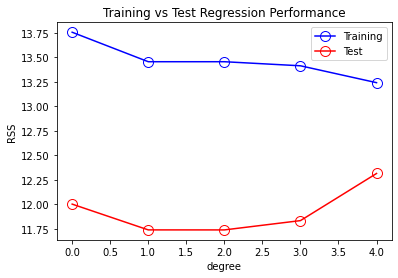

['stress_score']
R2 Score for 1 Polynomial Degrees:  0.0004561517590208064
R2 Score for 2 Polynomial Degrees:  0.05839445383242159
R2 Score for 3 Polynomial Degrees:  0.057312024482222834
R2 Score for 4 Polynomial Degrees:  0.05754534392119537
R2 Score for 5 Polynomial Degrees:  0.05737115614712973


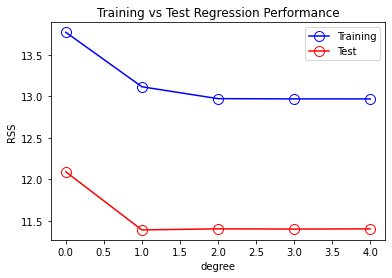

['steps']
R2 Score for 1 Polynomial Degrees:  0.0005410060341147771
R2 Score for 2 Polynomial Degrees:  -0.0003113416689857207
R2 Score for 3 Polynomial Degrees:  0.001737110170193068
R2 Score for 4 Polynomial Degrees:  0.0024195345392304946
R2 Score for 5 Polynomial Degrees:  0.0010125539132249672


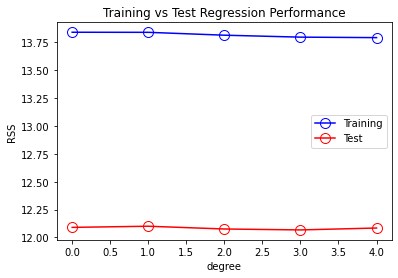

['exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  -0.0019497134030548313
R2 Score for 2 Polynomial Degrees:  -0.002340628030414127
R2 Score for 3 Polynomial Degrees:  -5.050480367341237e-05
R2 Score for 4 Polynomial Degrees:  0.00020203169131660648
R2 Score for 5 Polynomial Degrees:  0.0005349089441889499


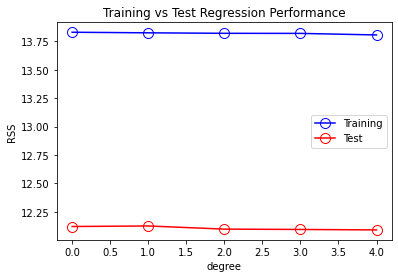

['bpm', 'stress_score']
R2 Score for 1 Polynomial Degrees:  0.009798614523074178
R2 Score for 2 Polynomial Degrees:  0.08802843969072982
R2 Score for 3 Polynomial Degrees:  0.07704575179403961
R2 Score for 4 Polynomial Degrees:  0.05061406019064363
R2 Score for 5 Polynomial Degrees:  -0.10275242221949377


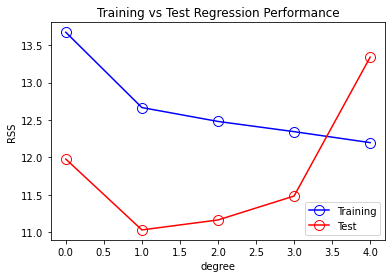

['bpm', 'steps']
R2 Score for 1 Polynomial Degrees:  0.0072757151231694905
R2 Score for 2 Polynomial Degrees:  0.02182872556737292
R2 Score for 3 Polynomial Degrees:  0.019580750944234615
R2 Score for 4 Polynomial Degrees:  -0.02023078405450418
R2 Score for 5 Polynomial Degrees:  -0.09807369415633471


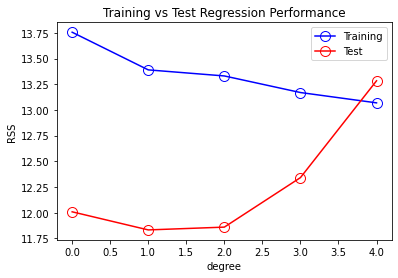

['bpm', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.006791682461337989
R2 Score for 2 Polynomial Degrees:  0.025150776031892863
R2 Score for 3 Polynomial Degrees:  0.015833683535662613
R2 Score for 4 Polynomial Degrees:  0.005844032722667758
R2 Score for 5 Polynomial Degrees:  -0.12670923029956938


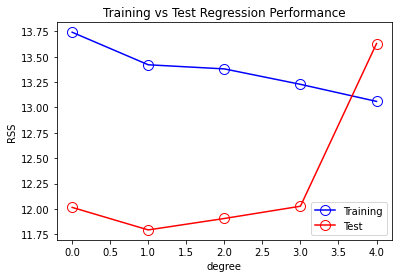

['stress_score', 'steps']
R2 Score for 1 Polynomial Degrees:  0.00044757155470454
R2 Score for 2 Polynomial Degrees:  0.06200796581813428
R2 Score for 3 Polynomial Degrees:  0.06532493857148147
R2 Score for 4 Polynomial Degrees:  0.060427771852339496
R2 Score for 5 Polynomial Degrees:  0.060904932006651036


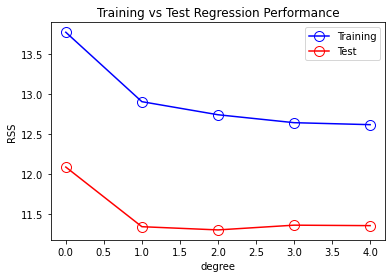

['stress_score', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.029918290038384865
R2 Score for 2 Polynomial Degrees:  0.10580863490374881
R2 Score for 3 Polynomial Degrees:  0.11167685009372341
R2 Score for 4 Polynomial Degrees:  0.10440339634797724
R2 Score for 5 Polynomial Degrees:  0.08647071400567352


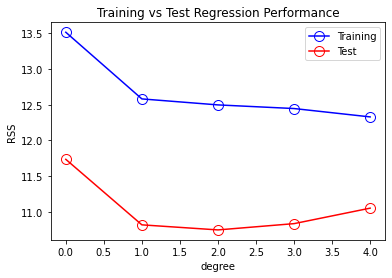

['steps', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  -0.0013569482129394128
R2 Score for 2 Polynomial Degrees:  -0.0013534419375789142
R2 Score for 3 Polynomial Degrees:  0.0032363710665427314
R2 Score for 4 Polynomial Degrees:  0.0009737897945534257
R2 Score for 5 Polynomial Degrees:  0.00030017293450046445


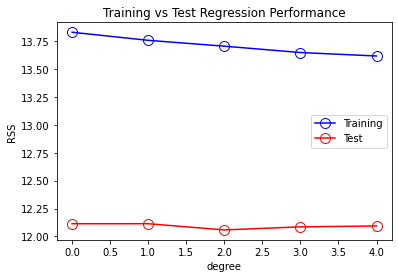

['bpm', 'stress_score', 'steps']
R2 Score for 1 Polynomial Degrees:  0.0071487982617880474
R2 Score for 2 Polynomial Degrees:  0.08365149691284746
R2 Score for 3 Polynomial Degrees:  0.08480076626523647
R2 Score for 4 Polynomial Degrees:  -0.03269343190277785
R2 Score for 5 Polynomial Degrees:  -0.2405527070485911


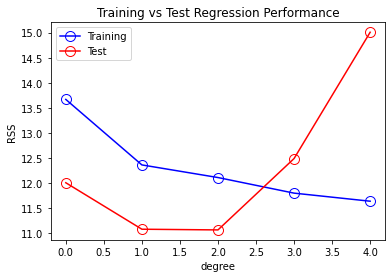

['bpm', 'stress_score', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.043602645004742646
R2 Score for 2 Polynomial Degrees:  0.1319143645701213
R2 Score for 3 Polynomial Degrees:  0.13758870754584018
R2 Score for 4 Polynomial Degrees:  0.09758497984461378
R2 Score for 5 Polynomial Degrees:  0.043356670094516714


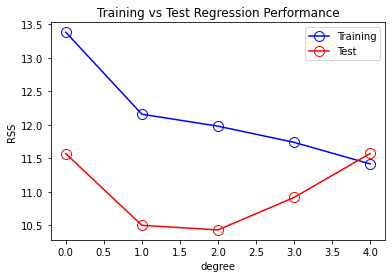

['bpm', 'steps', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.00464956660521787
R2 Score for 2 Polynomial Degrees:  0.014388799395408602
R2 Score for 3 Polynomial Degrees:  0.02067423582925565
R2 Score for 4 Polynomial Degrees:  -0.07321681325037188
R2 Score for 5 Polynomial Degrees:  -0.3915454125440272


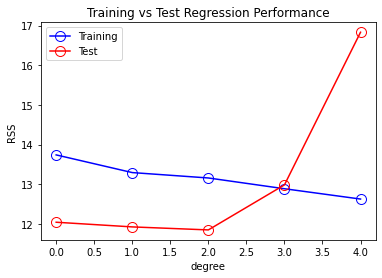

['stress_score', 'steps', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.041908384561429535
R2 Score for 2 Polynomial Degrees:  0.10949377109653535
R2 Score for 3 Polynomial Degrees:  0.12053832130949949
R2 Score for 4 Polynomial Degrees:  0.11847739518220468
R2 Score for 5 Polynomial Degrees:  0.11576775079106039


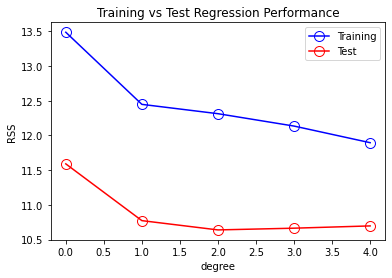

['bpm', 'stress_score', 'steps', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.051345393215803004
R2 Score for 2 Polynomial Degrees:  0.13241884245364388
R2 Score for 3 Polynomial Degrees:  0.14253909128320197
R2 Score for 4 Polynomial Degrees:  0.012945405656379805
R2 Score for 5 Polynomial Degrees:  -0.28971985233652386


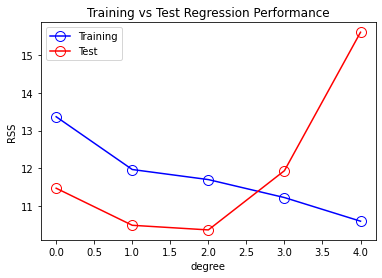

In [13]:
# Test model performance at closely predicting sleep quality according to the number of REM sleep hours each subject had. 

# Test according to all 15 possible combinations of the four exercise-related metrics, from 1 metric to 4
for i in range(1, 5):

    cols = list(itertools.combinations(['bpm', 'stress_score', 'steps', 'exertion_points_percentage'], i))

    for j in range(len(cols)):
        cols[j] = list(cols[j])

    for category in cols:

        print(category)

        training_errors = []
        validation_errors = []

        temp = df[['bpm', 'stress_score', 'steps', 'exertion_points_percentage', 'sleep_efficiency']].dropna()
        X = temp[category].to_numpy()

        y = temp['sleep_efficiency'].to_numpy()

        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

        # Iterate over possible degree hyperparameter values to find optimal regression classifier
        for i in range(1, 6):
            poly = PolynomialFeatures(i)
            X_train = poly.fit_transform(x_train)
            X_test = poly.fit_transform(x_test)

            model = LinearRegression(fit_intercept=False)
            model.fit(X_train, y_train)

            training_errors.append(lossf(model.predict(X_train), y_train))
            validation_errors.append(lossf(model.predict(X_test), y_test ))

            # Print R2 score corresponding to each tested degree for the current model
            print("R2 Score for", i, "Polynomial Degrees: ", r2_score(y_test, model.predict(X_test)))

        plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
        plt.plot(validation_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
        plt.legend()
        plt.xlabel("degree")
        plt.ylabel(lossf.__name__.upper())
        plt.title('Training vs Test Regression Performance')
        plt.show()

As can be generally observed from the above metrics and error visualizations, all of the 15 models trained using sleep efficiency ratings as a qualifier for sleep quality proved relatively ineffective at the prediction task. In addition to the fact that the greatest observed R2 value recorded from any train-test-split was approximately 0.14, and considering the relatively irregular trends of the training-test error curves that intersect beyond certain degrees, it can be reasoned that the potential of a linear regression model to correctly predict sleep efficiency according to the activity-related metrics in the selected dataframe is fairly low.

To substantiate these findings, our group felt it necessary to perform a secondary model-training process while qualifying sleep quality according to a different metric: the number of REM sleep hours each subject obtained on a given day. This metric was deemed relevant to analyses of sleep quality because it is inherently tied to a sleep phase that is largely responsible for healthy brain development and tied to more relaxed sleeping characteristics such as steadier breath[7]. The results of a near-identical analysis to the first with this slight modification are displayed below:

['bpm']
R2 Score for 1 Polynomial Degrees:  0.27366933620110834
R2 Score for 2 Polynomial Degrees:  0.2825128566938495
R2 Score for 3 Polynomial Degrees:  0.29279515448542615
R2 Score for 4 Polynomial Degrees:  0.2955658959612162
R2 Score for 5 Polynomial Degrees:  0.29025871660902436


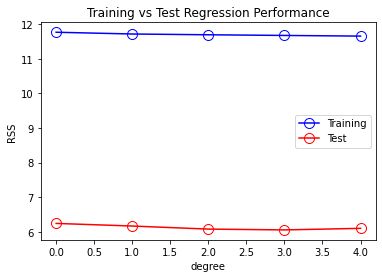

['stress_score']
R2 Score for 1 Polynomial Degrees:  0.012740185917475166
R2 Score for 2 Polynomial Degrees:  0.06423998007209974
R2 Score for 3 Polynomial Degrees:  0.06371209383791276
R2 Score for 4 Polynomial Degrees:  0.06340344158324551
R2 Score for 5 Polynomial Degrees:  0.06301158101432824


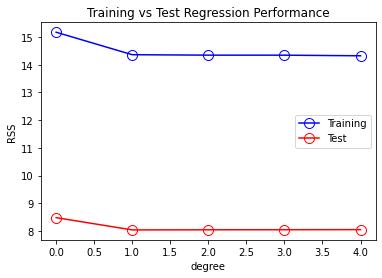

['steps']
R2 Score for 1 Polynomial Degrees:  0.03028176914220848
R2 Score for 2 Polynomial Degrees:  0.03189755219489199
R2 Score for 3 Polynomial Degrees:  0.043047618662808484
R2 Score for 4 Polynomial Degrees:  0.03847458536840753
R2 Score for 5 Polynomial Degrees:  -0.3322427605985503


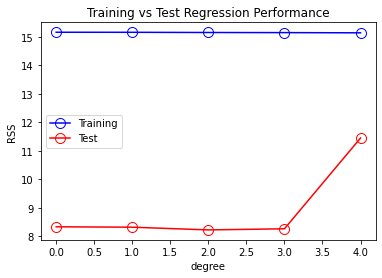

['exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.002488720985084125
R2 Score for 2 Polynomial Degrees:  0.05549435328790653
R2 Score for 3 Polynomial Degrees:  0.054919937220042736
R2 Score for 4 Polynomial Degrees:  0.054522196278362745
R2 Score for 5 Polynomial Degrees:  0.059366254580351385


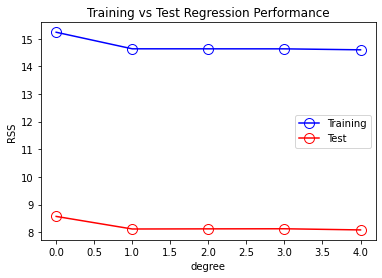

['bpm', 'stress_score']
R2 Score for 1 Polynomial Degrees:  0.28758880423985544
R2 Score for 2 Polynomial Degrees:  0.3368717491059974
R2 Score for 3 Polynomial Degrees:  0.3155462929343472
R2 Score for 4 Polynomial Degrees:  0.2245857279178317
R2 Score for 5 Polynomial Degrees:  0.25571620937687023


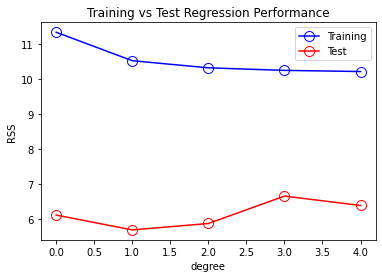

['bpm', 'steps']
R2 Score for 1 Polynomial Degrees:  0.3447358066744737
R2 Score for 2 Polynomial Degrees:  0.3612298126408847
R2 Score for 3 Polynomial Degrees:  0.3550808285838384
R2 Score for 4 Polynomial Degrees:  0.3173079395077113
R2 Score for 5 Polynomial Degrees:  -0.015017724706053226


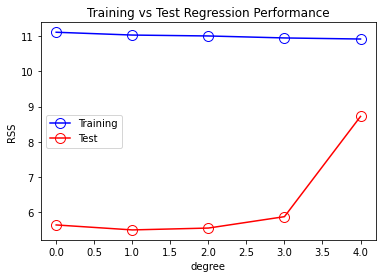

['bpm', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.27493141375461305
R2 Score for 2 Polynomial Degrees:  0.33922751796288875
R2 Score for 3 Polynomial Degrees:  0.3241733781017704
R2 Score for 4 Polynomial Degrees:  0.22881325615853632
R2 Score for 5 Polynomial Degrees:  0.2652490496497312


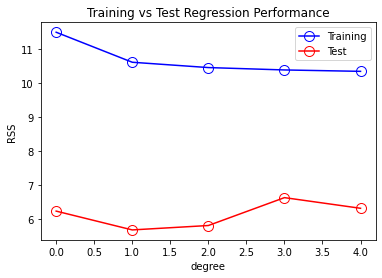

['stress_score', 'steps']
R2 Score for 1 Polynomial Degrees:  0.059895821576402164
R2 Score for 2 Polynomial Degrees:  0.08355304211037373
R2 Score for 3 Polynomial Degrees:  0.07522469284755728
R2 Score for 4 Polynomial Degrees:  0.058625006307779115
R2 Score for 5 Polynomial Degrees:  -0.46797325831150416


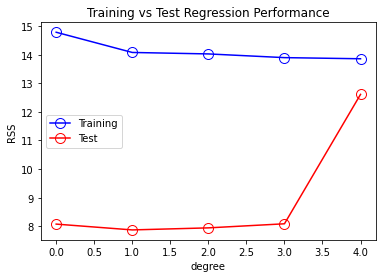

['stress_score', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.019086241091220257
R2 Score for 2 Polynomial Degrees:  0.06300292930048845
R2 Score for 3 Polynomial Degrees:  0.06289232536439004
R2 Score for 4 Polynomial Degrees:  0.06715508981144647
R2 Score for 5 Polynomial Degrees:  0.06253246899571052


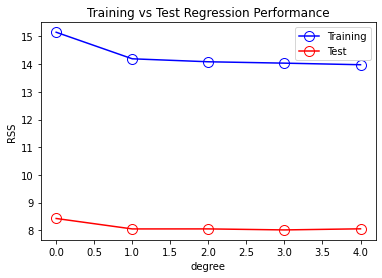

['steps', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.05400804271549198
R2 Score for 2 Polynomial Degrees:  0.0741382030614488
R2 Score for 3 Polynomial Degrees:  0.06710541081817323
R2 Score for 4 Polynomial Degrees:  0.08033357796366103
R2 Score for 5 Polynomial Degrees:  -0.6767987843158687


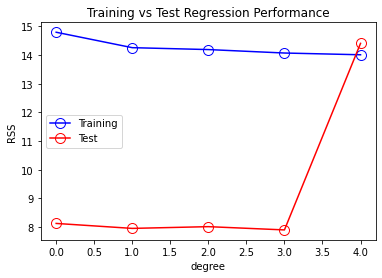

['bpm', 'stress_score', 'steps']
R2 Score for 1 Polynomial Degrees:  0.3757671840602911
R2 Score for 2 Polynomial Degrees:  0.38120945281531204
R2 Score for 3 Polynomial Degrees:  0.2996220039825951
R2 Score for 4 Polynomial Degrees:  0.15225572148343047
R2 Score for 5 Polynomial Degrees:  -0.4425002924152184


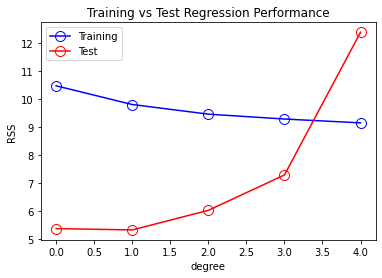

['bpm', 'stress_score', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.3040299537664112
R2 Score for 2 Polynomial Degrees:  0.34078572910208305
R2 Score for 3 Polynomial Degrees:  0.3216444106685846
R2 Score for 4 Polynomial Degrees:  0.23370952591338057
R2 Score for 5 Polynomial Degrees:  0.18424913813434296


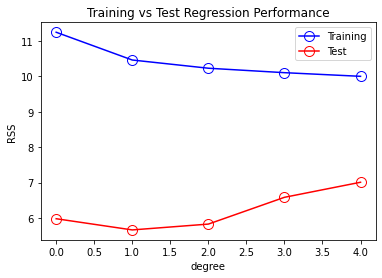

['bpm', 'steps', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.3678423032415201
R2 Score for 2 Polynomial Degrees:  0.375647895641655
R2 Score for 3 Polynomial Degrees:  0.29393746549629984
R2 Score for 4 Polynomial Degrees:  0.15958872660258538
R2 Score for 5 Polynomial Degrees:  -0.1605042201376461


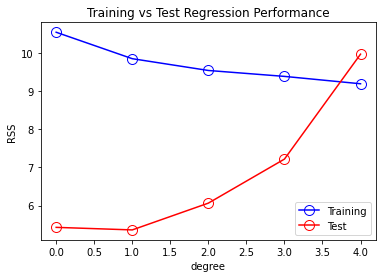

['stress_score', 'steps', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.05840835925453758
R2 Score for 2 Polynomial Degrees:  0.08841666665560755
R2 Score for 3 Polynomial Degrees:  0.06856752657389309
R2 Score for 4 Polynomial Degrees:  0.049093946468649285
R2 Score for 5 Polynomial Degrees:  -0.23833375489165154


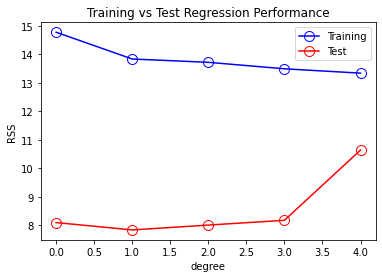

['bpm', 'stress_score', 'steps', 'exertion_points_percentage']
R2 Score for 1 Polynomial Degrees:  0.37622015576627565
R2 Score for 2 Polynomial Degrees:  0.3813090865506288
R2 Score for 3 Polynomial Degrees:  0.28635535677721347
R2 Score for 4 Polynomial Degrees:  0.07467879190385518
R2 Score for 5 Polynomial Degrees:  -0.05722817210187636


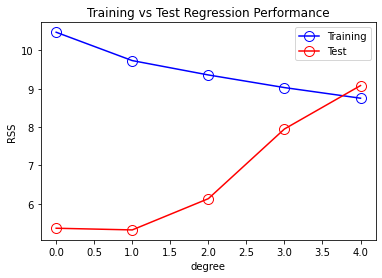

In [14]:
# Test model performance at closely predicting sleep quality according to the number of REM sleep hours each subject had. 

# Test according to all 15 possible combinations of the four exercise-related metrics, from 1 metric to 4

for i in range(1, 5):

    cols = list(itertools.combinations(['bpm', 'stress_score', 'steps', 'exertion_points_percentage'], i))

    for j in range(len(cols)):
        cols[j] = list(cols[j])

    
    for category in cols:

        print(category)

        training_errors = []
        validation_errors = []

        temp = df[['bpm', 'stress_score', 'steps', 'exertion_points_percentage', 'nremhr']].dropna()
        X = temp[category].to_numpy()
        # X = temp.stress_score

        y = temp['nremhr'].to_numpy()

        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

        # Iterate over possible degree hyperparameter values to find optimal regression classifier
        for i in range(1, 6):
            poly = PolynomialFeatures(i)
            X_train = poly.fit_transform(x_train)
            X_test = poly.fit_transform(x_test)

            model = LinearRegression(fit_intercept=False)
            model.fit(X_train, y_train)

            training_errors.append(lossf(model.predict(X_train), y_train))
            validation_errors.append(lossf(model.predict(X_test), y_test ))
            
            # Print R2 score corresponding to each tested degree for the current model
            print("R2 Score for", i, "Polynomial Degrees: ", r2_score(y_test, model.predict(X_test)))

        plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
        plt.plot(validation_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
        plt.legend()
        plt.xlabel("degree")
        plt.ylabel(lossf.__name__.upper())
        plt.title('Training vs Test Regression Performance')
        plt.show()

Despite the fact that the results of this second training process appeared to yield more affirmative results than the first, with maximum R2 values reaching approximately 0.38 and error curves with narrower RSS deficits between training and test data, it nevertheless appears to be the case that these models also ultimately proved to be relatively ineffective at the sleep quality prediction task. Considering the fact that optimized regression models are able to yield R2 scores at least above the intermediate value of 0.5 and do not demonstrate the irregular error curve trends displayed in the above visualizations, our group feels that it cannot be reasonably argued that these models predicting the number of REM hours slept by each subject according to their daily activity levels generate meaningful results and cannot be confidently applied to the task of extrapolation.

# NEW STUFF

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?


# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.


# Ethics & Privacy

As our dataset has a lot of personal health and exercise information, it is important that our participants remain anonymous. Although the participants gave consent to participate in the study and the data was collected unobtrusively, through a fitbit, it is possible to backtrack their identities in conjunction with their demographic information. Furthermore, because our project is so aligned with discovering what constitutes healthy exercising and sleeping patterns, we may be unintentionally promoting unhealthy exercise, dietary, and sleep habits. Health is not a one size fits all type situation, so we will take extra caution when discussing our findings.


### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   


### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.